# Codigo Para cargar un dataset CVS en la capa gratiuta de una Base de datos en MongoDB Atlas SQL

In [23]:
from pymongo import MongoClient
from pymongo.errors import PyMongoError, ServerSelectionTimeoutError

# Cadena de conexión
connection_string = 'mongodb+srv://<USER>:<PASSWOR>Vaa47YvmFke0tpl@<cluster-url>/.mongodb.net/c19-123-n-data-bi?retryWrites=true&w=majority'

try:
    client = MongoClient(connection_string, serverSelectionTimeoutMS=5000)  # Timeout de 5 segundos
    # Intenta realizar una operación simple para verificar la conexión
    db = client.list_database_names()
    print("Conexión exitosa:", db)
except ServerSelectionTimeoutError:
    print("No se pudo conectar al servidor. Verifica tu cadena de conexión y configuración de red.")
except PyMongoError as e:
    print("Error en la conexión con MongoDB:", e)


Conexión exitosa: ['c19-123-n-data-bi', 'admin', 'local']


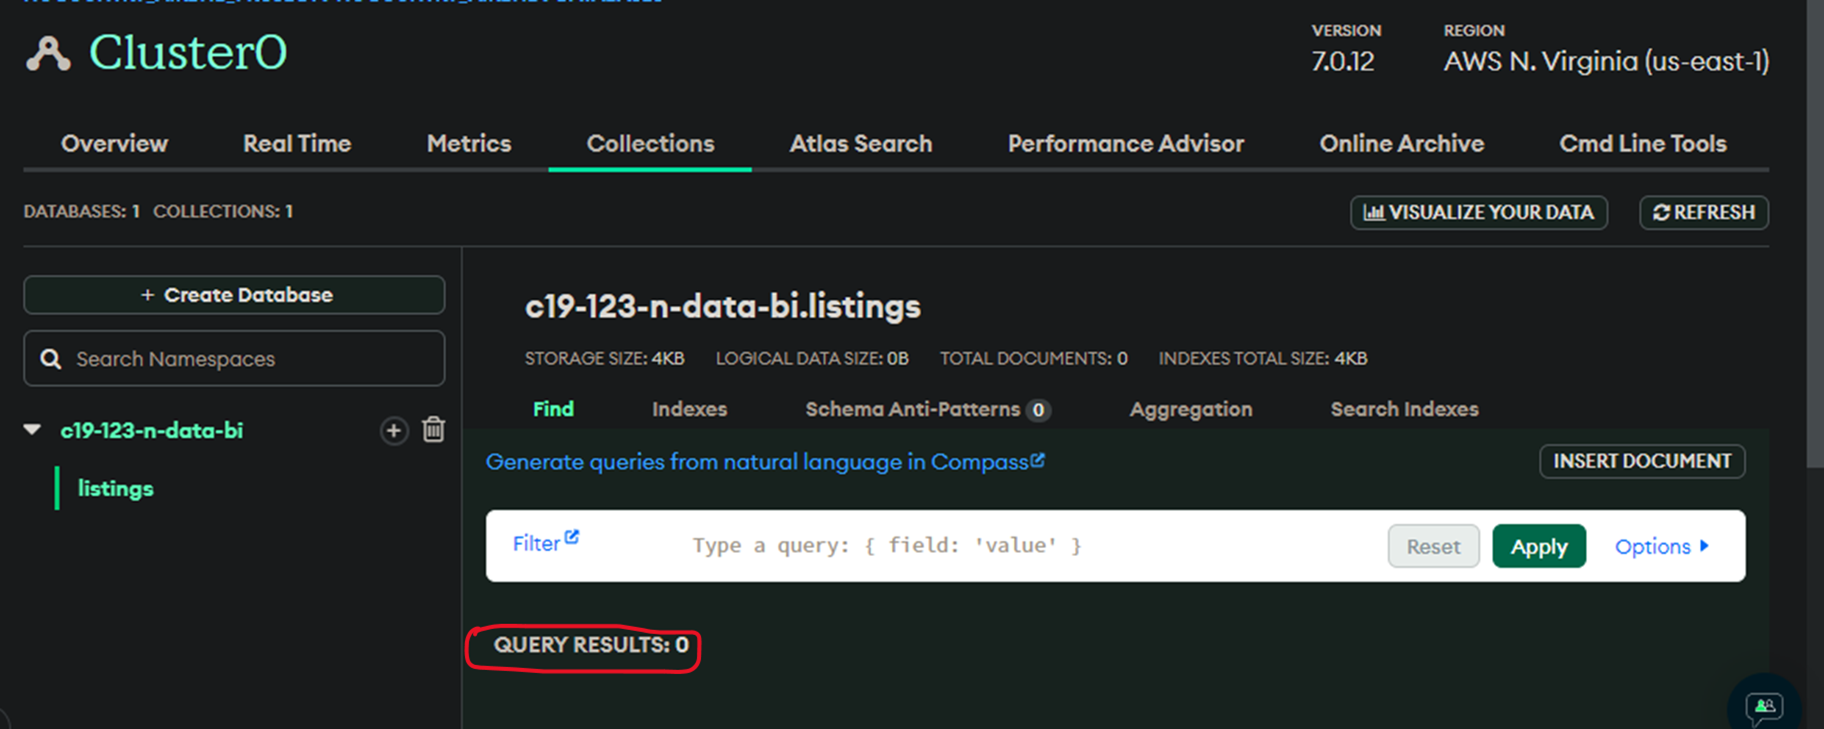

In [24]:
import pandas as pd
from pymongo import MongoClient
from tqdm import tqdm


# Leer el archivo CSV
df = pd.read_csv('Alemania_Berlin.csv')

# Conectar a MongoDB Atlas
connection_string = 'mongodb+srv://<USER>:<PASSWOR>Vaa47YvmFke0tpl@<cluster-url>/.mongodb.net/c19-123-n-data-bi?retryWrites=true&w=majority'



                      
# Seleccionar la base de datos y la colección
db = client['c19-123-n-data-bi']
collection = db['listings']

# Convertir cada fila del DataFrame en un diccionario e insertar en la colección
for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Cargando datos"):
    collection.insert_one(row.to_dict())

print("Datos cargados con éxito en la colección.")


Cargando datos: 100%|██████████| 8400/8400 [12:10<00:00, 11.50it/s]

Datos cargados con éxito en la colección.


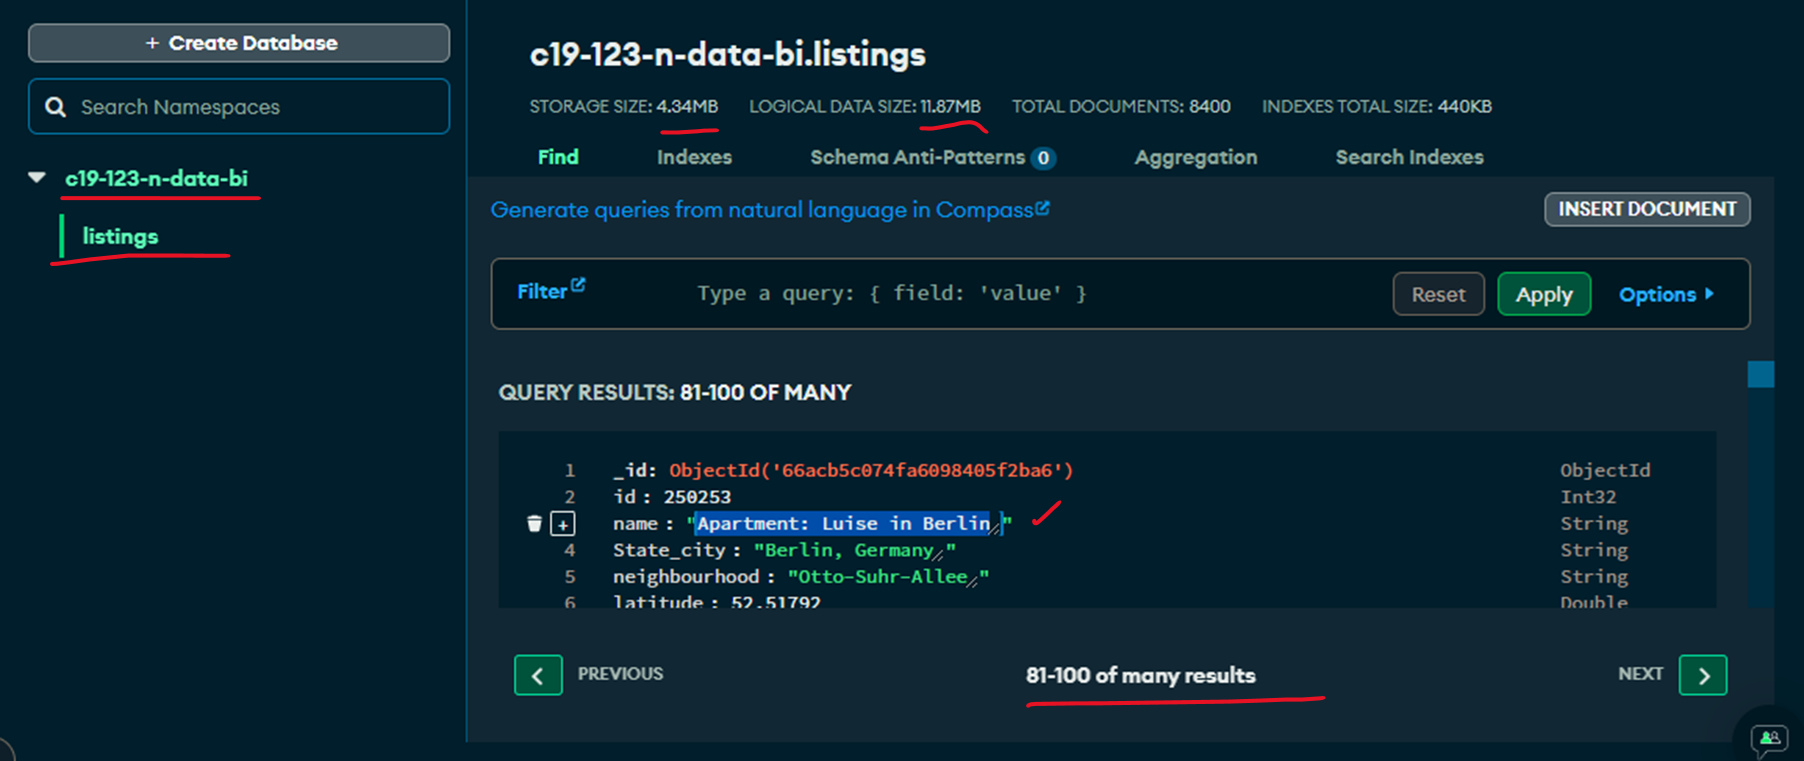

In [1]:
from bson.objectid import ObjectId
import datetime

# Tu ObjectId
oid = ObjectId("66acb5b874fa6098405f2b56")

# Obtener el timestamp
timestamp = oid.generation_time

# Convertir a datetime
datetime_obj = datetime.datetime.fromtimestamp(oid.generation_time.timestamp())

print(f"Timestamp: {timestamp}")
print(f"Datetime: {datetime_obj}")
print(f"Machine Identifier: {oid.binary[4:7].hex()}")
print(f"Process Identifier: {oid.binary[7:9].hex()}")
print(f"Counter: {oid.binary[9:12].hex()}")


Timestamp: 2024-08-02 10:32:24+00:00
Datetime: 2024-08-02 04:32:24
Machine Identifier: 74fa60
Process Identifier: 9840
Counter: 5f2b56
